## Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the dataset
fifa_df = pd.read_csv('fifa21_train.csv')
pd.set_option("display.max_columns", None)
fifa_df.head(50)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
5,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",154lbs,Right,0,"Jul 18, 2020",NaN,€1.4M,€11K,€2.2M,2020 ~ 2023,328,69,64,64,72,59.0,333,71,62.0,64,64,72,358,73,74,75.0,69,67.0,321,65,63.0,70,64,59,300,56,38.0,68.0,74.0,64,71.0,103,31,34,38.0,65,16,10,15,8,16,1808,379,4 ★,3★,High,Low,1 ★,74,63,70,71,37,64,6,67+2,67+2,67+2,70+0,69+0,69+0,69+0,70+0,70+1,70+1,70+1,70+1,66+2,66+2,66+2,70+1,58+2,55+2,55+2,55+2,58+2,55+2,49+2,49+2,49+2,55+2,19+2,71
6,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",154lbs,Right,0,"Sep 2, 2019",NaN,€6M,€28K,€10.8M,2019 ~ 2023,325,69,55,68,74,59.0,316,72,69.0,35,66,74,361,68,67,77.0,74,75.0,329,69,67.0,75,62,56,318,74

In [3]:
print('Shape:', fifa_df.shape)

#Standarizing header names
fifa_clean = fifa_df.copy()
fifa_clean.columns = list(map(lambda x: x.lower(), fifa_clean.columns))
fifa_clean.columns = list(map(lambda x: x.replace(" ", "_"), fifa_clean.columns))
fifa_clean.columns = list(map(lambda x: x.replace("/", "_"), fifa_clean.columns))
fifa_clean.rename(columns = {'team_&_contract': 'team'}, inplace = True)
print('Standardized cols:', list(fifa_clean.columns))

Shape: (11701, 101)
Standardized cols: ['id', 'name', 'age', 'nationality', 'club', 'bp', 'position', 'team', 'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'w_f', 'sm', 'a_w', 'd_w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb'

In [4]:
# Checking data types
print('Numerical cols are:', list(fifa_clean._get_numeric_data().columns),'\n')
print('Categorical cols are:', list(fifa_clean.select_dtypes(['object']).columns))

Numerical cols are: ['id', 'age', 'growth', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'ova'] 

Categorical cols are: ['name', 'nationality', 'club', 'bp', 'position', 'team', 'height', 'weight', 'foot', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'w_f', 'sm', 'a_w', 'd_w', 'ir', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm'

In our initial visual exploration, we have observed that:
- There is repeated information on cols position, team, contract or joined; we can drop this columns
- 95% of data on loan_date_end are missing values
- There are several categorical cols that contains numerical values (w_f, hits, ls, st...)

In [5]:
# Droping columns
fifa_reduced = fifa_clean.drop(['position', 'contract', 'team', 'loan_date_end', 'joined'], axis = 1).reset_index(drop=True)
display(fifa_reduced.shape)

(11701, 96)

In [6]:
# Droping duplicates
print('Before droping duplicates:', fifa_reduced.shape)
fifa_reduced.drop_duplicates()
print('After droping duplicates:', fifa_reduced.shape)

Before droping duplicates: (11701, 96)
After droping duplicates: (11701, 96)


Cleaning categorical columns

In [7]:
# Replace &amp character on nationality
fifa_reduced['nationality'] = fifa_reduced['nationality'].str.replace("&amp;","and")

# Replace incorrect club info for 'Unknown'
clubs_list = fifa_reduced['club'].to_list()
countries_list = fifa_reduced['nationality'].to_list()

for i in range(len(countries_list)):
    if clubs_list[i] == countries_list[i]:
        clubs_list[i] = "Unknown"

fifa_reduced['club'] = clubs_list

# Clean height and convert to numeric data
fifa_reduced['height'] = fifa_reduced['height'].str.replace('[^\d]', '.')
fifa_reduced['height'] = fifa_reduced['height'].str.slice_replace(start = -1, repl = '')

# Clean weight and convert to numeric data
fifa_reduced['weight'] = fifa_reduced['weight'].str.replace('lbs', '', regex=True)
fifa_reduced['weight'].astype(int)

# Convert value, wage and release_clause
def clean_k(x):
    new_values = []
    for i in x:
        if (i.endswith("M") == True):
            no_m = i.replace('M', '')
            no_euro = no_m.replace('€', '')
            final_num = float(no_euro) * 1000000
            new_values.append(int(final_num))
        elif (i.endswith("K") == True):
            no_k = i.replace('K', '')
            no_euro_k = no_k.replace('€', '')
            final_num_k = float(no_euro_k) * 1000
            new_values.append(int(final_num_k))
        else:
            final_num_e = i.replace('€', '')
            new_values.append(int(final_num_e))

    return new_values

fifa_reduced['value'] = clean_k(fifa_reduced['value'])
fifa_reduced['wage'] = clean_k(fifa_reduced['wage'])
fifa_reduced['release_clause'] = clean_k(fifa_reduced['release_clause'])
fifa_reduced['hits'] = clean_k(fifa_reduced['hits'])

C:\Users\ameli\AppData\Local\Temp\ipykernel_28216\3491543858.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  fifa_reduced['height'] = fifa_reduced['height'].str.replace('[^\d]', '.')


In [8]:
# Columns from LS to GK [:68: 94] contain an addition sign. We opt for eliminating everything at the right of the “+” sign, including it.
for i in fifa_reduced.iloc[:,68:95]:
    fifa_reduced[i] = fifa_reduced[i].str.split('+').str[0].astype(int)

# Droping stars and K
fifa_reduced[['w_f','sm', 'ir']] = fifa_reduced[['w_f','sm', 'ir']].replace('[^\d]', '', regex=True).astype(int)

In [9]:
#Check nan values on categorical cols
fifa_reduced[['club']] = fifa_reduced[['club']].fillna('Unknown')
most_freq_a_w = fifa_reduced['a_w'].value_counts().idxmax()
fifa_reduced['a_w'] = fifa_reduced['a_w'].fillna(fifa_reduced['a_w'].value_counts().idxmax())
most_freq_d_w = fifa_reduced['d_w'].value_counts().idxmax()
fifa_reduced['d_w'] = fifa_reduced['d_w'].fillna(most_freq_d_w)
print(fifa_reduced.select_dtypes(['object']).isna().sum().head(20))

name           0
nationality    0
club           0
bp             0
height         0
weight         0
foot           0
a_w            0
d_w            0
dtype: int64


In [10]:
# Forcing to numeric type
fifa_reduced['weight'] = pd.to_numeric(fifa_reduced['weight'], errors = 'coerce')
fifa_reduced['height'] = pd.to_numeric(fifa_reduced['height'], errors = 'coerce')

print('Numerical cols are:', list(fifa_reduced._get_numeric_data().columns),'\n')
print('Categorical cols are:', list(fifa_reduced.select_dtypes(['object']).columns))

Numerical cols are: ['id', 'age', 'height', 'weight', 'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'w_f', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'] 

Categorical cols are: ['name', 'nationality', 'club', 'bp', 

In [11]:
# Checking nan on numerical cols
print(fifa_reduced[fifa_reduced.columns[fifa_reduced.isna().any()]])
fifa_reduced[['vision', 'composure', 'balance', 'jumping', 'interceptions', 'positioning', 'sliding_tackle', 'volleys', 'curve', 'agility']].describe()

       volleys  curve  agility  balance  jumping  interceptions  positioning  \
0         44.0   44.0     61.0     82.0     73.0           52.0         62.0   
1         76.0   78.0     88.0     75.0     81.0           33.0         78.0   
2         75.0   89.0     93.0     93.0     34.0           26.0         80.0   
3         36.0   41.0     59.0     55.0     60.0           57.0         31.0   
4         34.0   44.0     61.0     69.0     34.0           60.0         55.0   
...        ...    ...      ...      ...      ...            ...          ...   
11696     28.0   49.0     68.0     61.0     72.0           59.0         51.0   
11697     16.0   15.0     38.0     54.0     59.0           22.0         15.0   
11698     41.0   57.0     86.0     87.0     71.0           25.0         66.0   
11699      NaN    NaN      NaN      NaN      NaN           61.0         63.0   
11700     53.0   41.0     87.0     84.0     85.0           20.0         66.0   

       vision  composure  sliding_tackl

,vision,composure,balance,jumping,interceptions,positioning,sliding_tackle,volleys,curve,agility
count,11660.000000,11422.000000,11660.000000,11660.000000,11694.000000,11694.000000,11660.000000,11660.000000,11660.000000,11660.000000
mean,55.439194,59.947732,64.709348,65.036621,46.815119,52.485890,45.827702,45.067324,49.617839,64.582075
std,13.695285,11.769872,14.131318,12.017118,20.808153,19.069465,21.217062,17.732902,18.180408,14.484351
min,10.000000,12.000000,17.000000,25.000000,5.000000,2.000000,6.000000,4.000000,4.000000,14.000000
25%,47.000000,53.000000,57.000000,58.000000,26.000000,43.000000,25.000000,32.000000,37.000000,57.000000
50%,57.000000,61.000000,67.000000,66.000000,52.000000,57.000000,52.000000,47.000000,52.000000,67.000000
75%,65.000000,68.000000,75.000000,73.000000,65.000000,66.000000,64.000000,59.000000,64.000000,75.000000
max,95.000000,96.000000,97.000000,95.000000,95.000000,96.000000,90.000000,90.000000,94.000000,96.000000


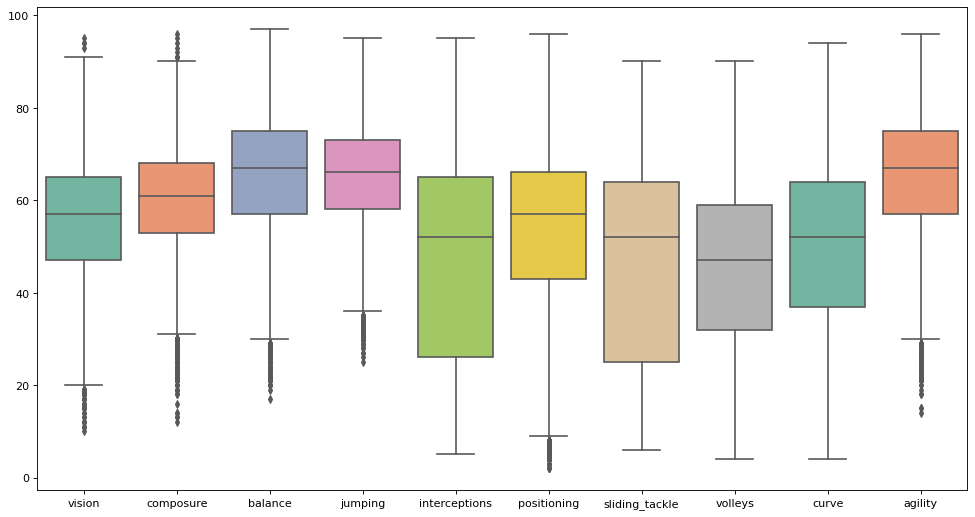

In [12]:
# What are we going to do with nan values?
fig, ax = plt.subplots(figsize = (15,8), dpi = 80)
ax= sns.boxplot(data=fifa_reduced[['vision', 'composure', 'balance', 'jumping', 'interceptions', 'positioning', 'sliding_tackle', 'volleys', 'curve', 'agility']], 
                orient="v", palette="Set2")
plt.show()

# Looks like we have some extreme values but mean looks quite similar to median, so we're going to replace nan values with mean
numerical_nan = ['vision', 'composure', 'balance', 'jumping', 'interceptions', 'positioning', 'sliding_tackle', 'volleys', 'curve', 'agility']
for i in numerical_nan:
    mean_val = round(np.mean(fifa_reduced[i]))
    fifa_reduced[i] = fifa_reduced[i].fillna(mean_val)

In [13]:
display(fifa_reduced.head(50))

,id,name,age,nationality,club,bp,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w_f,sm,a_w,d_w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,5.90,161,Right,1,525000,4000,801000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,6.00,159,Right,0,8500000,23000,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,5.40,134,Right,0,9000000,49000,15300000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,5.10,152,Right,13,275000,4000,694000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,5.11,150,Right,8,725000,2000,1400000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
5,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,5.10,154,Right,0,1400000,11000,2200000,328,69,64,64,72,59.0,333,71,62.0,64,64,72,358,73,74,75.0,69,67.0,321,65,63.0,70,64,59,300,56,38.0,68.0,74.0,64,71.0,103,31,34,38.0,65,16,10,15,8,16,1808,379,4,3,High,Low,1,74,63,70,71,37,64,6,67,67,67,70,69,69,69,70,70,70,70,70,66,66,66,70,58,55,55,55,58,55,49,49,49,55,19,71
6,184392,M. Darmian,30,Italy,Parma,RB,6.00,154,Right,0,6000000,28000,10800000,325,69,55,68,74,59.0,316,72,69.0,35,66,74,361,68,67,77.0,74,75.0,329,69,67.0,75,62,56,318,74,77.0,63.0,59.0,45,78.0,235,78,80,77.0,39,6,7,7,12,7,1923,410,5,3,Medium,High,2,67,58,67,73,77,68,49,66,66,66,68,67,67,67,68,68,68,68,69,70,70,70,69,74,74,74,74,74,74,74,74,74,74,15,76
7,257768,N. Mosti,22,Italy,AC Monza,LM,5.10,161,Left,7,300000,800,540000,262,58,56,42,68,38.0,273,60,55.0,39,63,56,323,62,62,67.0,60,72.0,240,50,55.0,57,51,27,245,45,33.0,63.0,65.0,39,50.0,129,41,49,39.0,51,6,14,12,10,9,1523,327,2,2,Medium,Medium,1,62,48,63,60,42,52,4,55,55,55,59,58,58,58,59,60,60,60,61,59,59,59,61,52,52,52,52,52,50,46,46,46,50,15,60
8,225013,M. Čovilo,34,Bosnia Herzegovina,FC Lugano,CB,6.40,192,Right,0,210000,2000,305000,277,54,46,70,63,44.0,281,56,43.0,57,62,63,200,33,35,34.0,64,34.0,343,54,86.0,57,90,56,294,62,69.0,62.0,52.0,49,63.0,192,58,69,65.0,49,15,6,7,9,12,1636,338,2,2,Medium,Medium,1,34,50,58,55,65,76,4,57,57,57,54,56,56,56,54,56,56,56,55,61,61,61,55,59,64,64,64,59,60,68,68,68,60,16,65
9,179698,L. Grimi,35,Arge

## Part 2 - First run this functions

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime

In [15]:
fifa_df = pd.read_csv('fifa21_train.csv')

def standardize(df_copy):
    df_copy.columns = list(map(lambda x: x.lower(), df_copy.columns))
    df_copy.columns = list(map(lambda x: x.replace(" ", "_"), df_copy.columns))
    df_copy.columns = list(map(lambda x: x.replace("/", "_"), df_copy.columns))
    return df_copy


def drop_info_and_duplicates(df_copy):
    df_copy = df_copy.drop(['position', 'contract', 'team_&_contract', 'loan_date_end', 'joined'], axis = 1).reset_index(drop=True)
    df_copy = df_copy.drop_duplicates()
    return df_copy


def clean_values(df_copy):
    # Function to clean monetary values
    def clean_k(x):
        new_values = []
        for i in x:
            if (i.endswith("M") == True):
                no_m = i.replace('M', '')
                no_euro = no_m.replace('€', '')
                final_num = float(no_euro) * 1000000
                new_values.append(int(final_num))
            elif (i.endswith("K") == True):
                no_k = i.replace('K', '')
                no_euro_k = no_k.replace('€', '')
                final_num_k = float(no_euro_k) * 1000
                new_values.append(int(final_num_k))
            else:
                final_num_e = i.replace('€', '')
                new_values.append(int(final_num_e))
        return new_values

    df_copy['nationality'] = df_copy['nationality'].str.replace("&amp;","and")  # Replace &amp characters on nationality
    df_copy['height'] = df_copy['height'].str.replace('[^\d]', '.')     # Clean height and convert to numeric data
    df_copy['height'] = df_copy['height'].str.slice_replace(start = -1, repl = '')
    df_copy['weight'] = df_copy['weight'].replace('lbs', '', regex=True)
    df_copy[['value', 'wage', 'release_clause', 'hits']] = df_copy[['value', 
                                                                    'wage', 
                                                                    'release_clause', 
                                                                    'hits']].apply(clean_k)

    # Columns from LS to GK [:68:94] contain an addition sign. 
    # We opt for eliminating everything at the right of the “+” sign, including it.
    for i in df_copy.iloc[:,68:95]:
        df_copy[i] = df_copy[i].str.split('+').str[0].astype(int)

    # Droping stars and K
    df_copy[['w_f','sm', 'ir']] = df_copy[['w_f','sm', 'ir']].replace('[^\d]', '', regex=True).astype(int)
    df_copy['hits'] = df_copy['hits'].replace('K', '', regex=True)

    # Replace incorrect club info for 'Unknown'
    clubs_list = df_copy['club'].to_list()
    countries_list = df_copy['nationality'].to_list()
    for i in range(len(countries_list)):
        if clubs_list[i] == countries_list[i]:
            clubs_list[i] = "Unknown"
    df_copy['club'] = clubs_list
    
    return df_copy


def handling_nan_and_type(df_copy):
    # For categorical variables
    df_copy[['club']] = df_copy[['club']].fillna('Unknown')
    most_freq_a_w = df_copy['a_w'].value_counts().idxmax()
    df_copy['a_w'] = df_copy['a_w'].fillna(most_freq_a_w)
    most_freq_d_w = df_copy['d_w'].value_counts().idxmax()
    df_copy['d_w'] = df_copy['d_w'].fillna(most_freq_d_w)

    # For numerical variables
    numerical_cols = ['vision', 'composure', 'balance', 'jumping', 'interceptions', 
                      'positioning', 'sliding_tackle', 'volleys', 'curve', 'agility']
    for i in numerical_cols:
        mean_val = round(np.mean(df_copy[i]))
        df_copy[i] = df_copy[i].fillna(mean_val)
    
    # Forcing change of type
    df_copy['weight'] = pd.to_numeric(df_copy['weight'], errors = 'coerce')
    df_copy['height'] = pd.to_numeric(df_copy['height'], errors = 'coerce')
    
    if df_copy.isnull().values.any() == True:
        print('There still are some nan values, take a look at it')
    else:
        print('All good! Dataset cleaned')
    
    return df_copy

def process_df(df):
    df_copy = df.copy()
    df_standard = standardize(df_copy)
    df_droped = drop_info_and_duplicates(df_standard)
    df_cleaned = clean_values(df_droped) 
    df_nan_handled = handling_nan_and_type(df_cleaned)
    print ('Shape of cleaned dataframe:', df_nan_handled.shape)
    return df_nan_handled

In [16]:
fifa_preprocessed = process_df(fifa_df)
fifa_preprocessed

C:\Users\ameli\AppData\Local\Temp\ipykernel_28216\2998045809.py:37: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['height'] = df_copy['height'].str.replace('[^\d]', '.')     # Clean height and convert to numeric data


All good! Dataset cleaned
Shape of cleaned dataframe: (11701, 96)


,id,name,age,nationality,club,bp,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w_f,sm,a_w,d_w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,5.90,161,Right,1,525000,4000,801000,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,6.00,159,Right,0,8500000,23000,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,5.40,134,Right,0,9000000,49000,15300000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,5.10,152,Right,13,275000,4000,694000,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,5.11,150,Right,8,725000,2000,1400000,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,6.10,168,Left,5,625000,3000,891000,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3,2,Medium,Medium,1,75,28,56,59,60,69,3,48,48,48,55,52,52,52,55,54,54,54,58,56,56,56,58,63,60,60,60,63,63,61,61,61,63,16,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,6.10,174,Right,4,1600000,4000,2900000,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,2,1,Medium,Medium,1,72,67,66,72,40,70,3,28,28,28,24,26,26,26,24,24,24,24,25,25,25,25,25,25,26,26,26,25,24,26,26,26,24,69,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,5.60,143,Right,8,1100000,2000,1700000,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,3,3,High,Medium,1,76,60,60,72,26,43,6,62,62,62,67,65,65,65,67,65,65,65,66,58,58,58,66,49,44,44,44,49,45,

## Part 3

In [17]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [18]:
correlations_matrix = fifa_preprocessed.corr()
correlations_matrix.where((correlations_matrix > 0.70) | (correlations_matrix < -0.70)).head(60)

,id,age,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w_f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
id,1.0000,-0.743300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.7433,1.000000,NaN,NaN,-0.854136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
growth,NaN,-0.854136,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,NaN,NaN,NaN,NaN,NaN,1.000000,0.820164,0.978753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wage,NaN,NaN,NaN,NaN,NaN,0.820164,1.000000,0.798577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_clause,NaN,NaN,NaN,NaN,NaN,0.978753,0.798577,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.842204,0.877748,0.705065,0.880607,0.897411,0.928584,0.914303,0.852391,0.778454,0.729526,0.935176,NaN,NaN,NaN,NaN,NaN,NaN,0.823527,0.710530,NaN,NaN,NaN,0.889165,0.888604,NaN,NaN,0.908466,0.719772,0.838863,0.707718,NaN,NaN,NaN,NaN,-0.769826,-0.761378,-0.760690,-0.746389,-0.757429,-0.762198,0.902862,NaN,NaN,0.765994

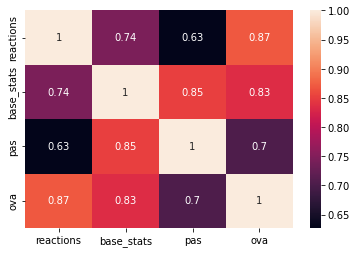

In [19]:
# We have checked threshold correlation for our numerical variables
# and conclude that base_stats, reactions and pas are the ones highly correlated to ova
# But we've checked for multicollinearity and pas and base stats are also highly correlated, so
# we've decided to drop base stats col
matrix_subset = fifa_preprocessed[['reactions', 'base_stats', 'pas', 'ova']]
sns.heatmap(matrix_subset.corr(), annot=True)
plt.show()

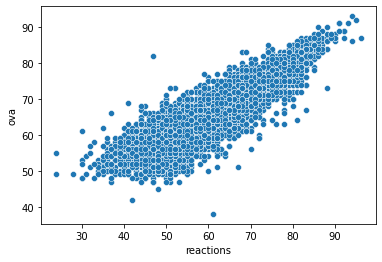

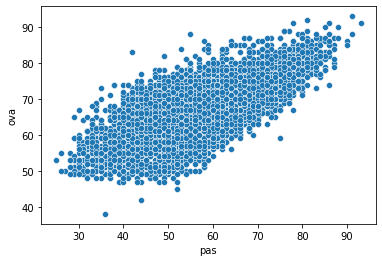

In [20]:
# Checking correlation visually
sns.scatterplot(x='reactions',y='ova',data=fifa_reduced)
plt.show()

sns.scatterplot(x='pas',y='ova',data=fifa_reduced)
plt.show()

In [21]:
# X - y split
fifa_to_model = pd.DataFrame(fifa_reduced[['ova','reactions', 'pas']])
y = fifa_to_model['ova']
X = fifa_to_model.drop('ova', axis=1)

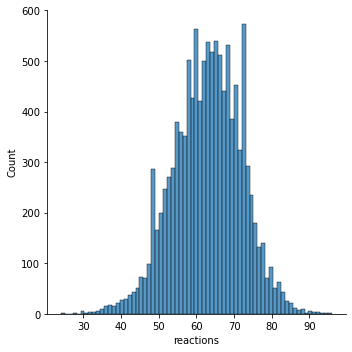

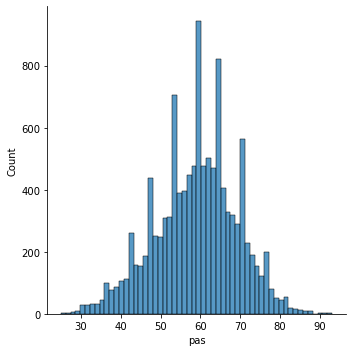

In [22]:
# Check distribution visually
sns.displot(fifa_to_model['reactions'])
sns.displot(fifa_to_model['pas'])
plt.show()

In [23]:
# First we fit the model without scaling variables
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

def create_linear_model(X,y):
    lm=LinearRegression()
    lm.fit(X,y)
    print('The intercept:', lm.intercept_)
    print('The coeficients:', lm.coef_)
    y_pred = lm.predict(X)
    r2 = lm.score(X,y)
    mse = mean_squared_error(y_pred, y)
    mse2 = np.sqrt(mse)
    print("R2 is {:.3f}".format(r2))
    print("The MSE is: {:.2f}".format(mse))
    print("The RMSE is: {:.2f}".format(mse2))
    c = list(zip(list(X.columns), list(lm.coef_)))
    print(c)
    
    return lm, r2, mse

print('TRAIN SET MODELED NO STANDARDSCALER')
trainset_validation = create_linear_model(X_train, y_train)
print('')
print('TEST SET MODELED NO STANDARDSCALER')
testset_validation = create_linear_model(X_test, y_test)

TRAIN SET NO SCALING
The intercept: 22.68223404141778
The coeficients: [0.5396632  0.17499335]
R2 is 0.799
The MSE is: 9.59
The RMSE is: 3.10
[('reactions', 0.53966319895035), ('pas', 0.174993348142274)]

TEST SET NO SCALING
The intercept: 22.64022583615054
The coeficients: [0.53848966 0.17639852]
R2 is 0.798
The MSE is: 9.43
The RMSE is: 3.07
[('reactions', 0.5384896644814008), ('pas', 0.17639851824781178)]


## Applying StandardScaler

In [24]:
# Standarize data
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)
X_num = pd.DataFrame(x_standardized, columns=X.columns)

(11701, 2)


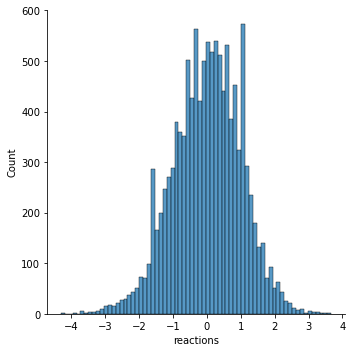

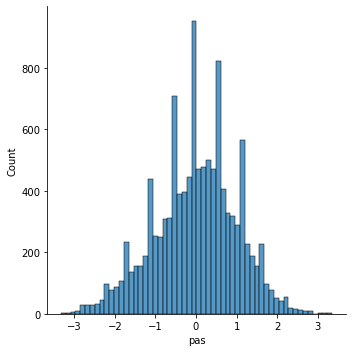

In [25]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X_num, y, 
                                                           test_size=0.33, random_state=100)

sns.displot(X_num['reactions'])
sns.displot(X_num['pas'])
plt.show()

In [26]:
print('TRAIN SET MODELED WITH STANDARDSCALER')
trainset_validation = create_linear_model(X_train_s, y_train_s)
print('')
print('TEST SET MODELED WITH STANDARDSCALER')
testset_validation = create_linear_model(X_test_s, y_test_s)

TRAIN SET WITH STANDARDSCALER
The intercept: 66.93288984835645
The coeficients: [4.86766124 1.78047047]
R2 is 0.799
The MSE is: 9.59
The RMSE is: 3.10
[('reactions', 4.867661244821362), ('pas', 1.7804704744822264)]

TEST SET WITH STANDARDSCALER
The intercept: 66.8998215596853
The coeficients: [4.85707618 1.79476738]
R2 is 0.798
The MSE is: 9.43
The RMSE is: 3.07
[('reactions', 4.857076183129051), ('pas', 1.7947673829710045)]
